In [17]:
import numpy as np
from astropy.io import ascii

from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
# func() finds time-derivatives of u.

def func (u_old, xi):
    
    # local variables
    
    y = u_old[0]
    z = u_old[1]
    
    f = np.zeros_like(u_old)
    
    # getting derivatives from Lane-Emden equations
    
    if xi==0:
        
        dy = z
        dz = - 1./3.
        
    else:
        
        dy = z
        dz = - y**n - (2./xi)*z
    
    # setting xi-derivatives of u
    
    f[0] = dy
    f[1] = dz
    
    return f

### Fortran solver

In [49]:
data = ascii.read("output.dat")

### Scipy solver

In [50]:
### Particle initialization

# polytropic index
n = 3


# coordinates

th_a = np.array([1.])
dth_a = np.array([0.])

u_a = np.concatenate((th_a,dth_a))

U_old = np.concatenate((th_a,dth_a))
xi_ = data['xi']

U_soln = odeint(func, U_old, xi_)

theta_s= U_soln[:,0]

### Comparison

/Users/TARS/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


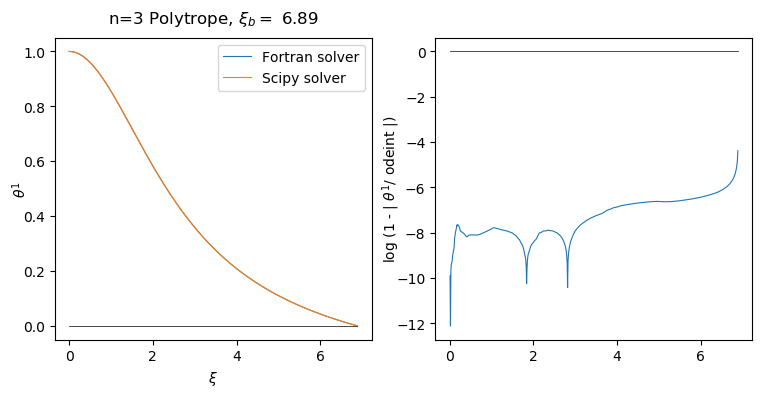

In [51]:
fig, ax = plt.subplots(1,2, figsize=(9, 4), dpi=100)


ax[0].plot(data['xi'], data['theta'], lw=0.8, label='Fortran solver')

ax[0].plot(xi_, theta_s, lw=0.8, label='Scipy solver')

ax[0].plot(data['xi'], np.zeros_like(theta_s)*0, c='k', lw=0.5)


ax[0].set_xlabel(r'$\xi$')

ax[0].set_ylabel(f'$\\theta ^1$', labelpad=-4)

ax[0].legend()

ax[0].set_title(f"n={n} Polytrope, $\\xi_b =${xi_[-1]:{5}.{4}}", y=1.02)



ax[1].plot(xi_, np.log10(np.abs(1 - data['theta']/theta_s)), label='log error', lw=0.8)

ax[1].plot(xi_, theta_s*0, c='k', lw=0.5)



#ax[1].set_xlabel(r'$\xi$')

ax[1].set_ylabel(f'log (1 - | $\\theta^{{{1}}} /$ odeint |)', labelpad=-4)

#ax[1].set_title(f"error estimate", y=1.02)



fig.savefig(f'fortran3.png')